In [1]:
import numpy as np
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

sampler = SamplerV2()

### Compare what happens when applying each standard operator and applying it twice

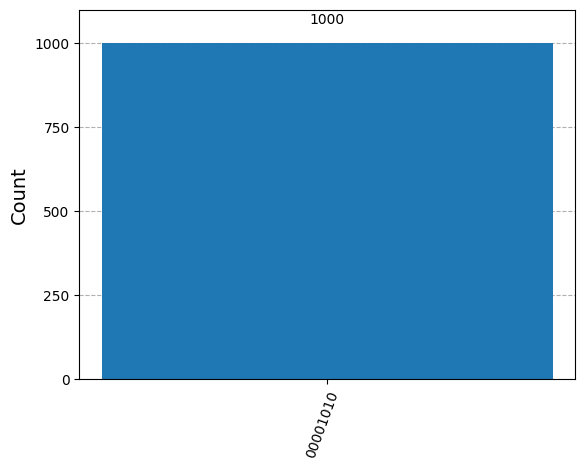

In [2]:
qc = QuantumCircuit(8)
qc.x(1)
qc.x(2)
qc.x(2)
qc.y(3)
qc.y(4)
qc.y(4)
qc.z(5)
qc.z(6)
qc.z(6)
qc.measure_all()
qc.draw()
result = sampler.run([qc], shots=1000).result()

plot_histogram(result[0].data.meas.get_counts())

### Check what happens when applying each operator to a Bell Circuit and applying each twice

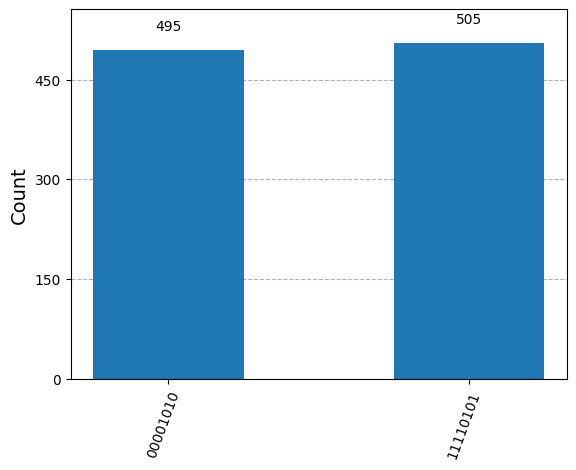

In [3]:
qch = QuantumCircuit(8)
qch.h(0)
for i in range(1,8):
    qch.cx(0,i)
qch.x(1)
qch.x(2)
qch.x(2)
qch.y(3)
qch.y(4)
qch.y(4)
qch.z(5)
qch.z(6)
qch.z(6)
qch.measure_all()
qch.draw()
result2 = sampler.run([qch], shots=1000).result()

plot_histogram(result2[0].data.meas.get_counts())

### Compare with doing operators before the Hadamard gates

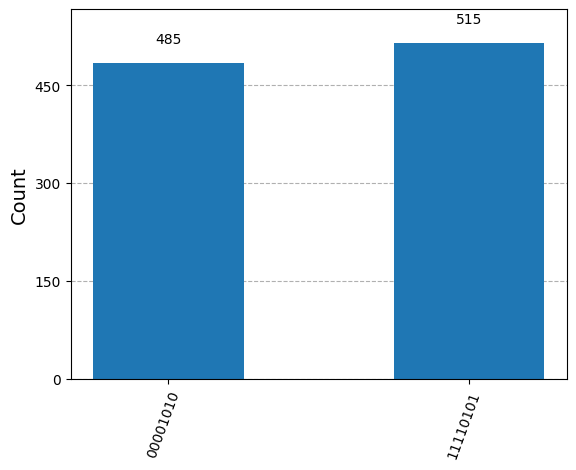

In [4]:
qch2 = QuantumCircuit(8)
qch2.x(1)
qch2.x(2)
qch2.x(2)
qch2.y(3)
qch2.y(4)
qch2.y(4)
qch2.z(5)
qch2.z(6)
qch2.z(6)
qch2.h(0)
for i in range(1,8):
    qch2.cx(0,i)

qch2.measure_all()
qch2.draw()
result3 = sampler.run([qch2], shots=1000).result()

plot_histogram(result3[0].data.meas.get_counts())

### Explore using pauli matrices repeated but not consequtively

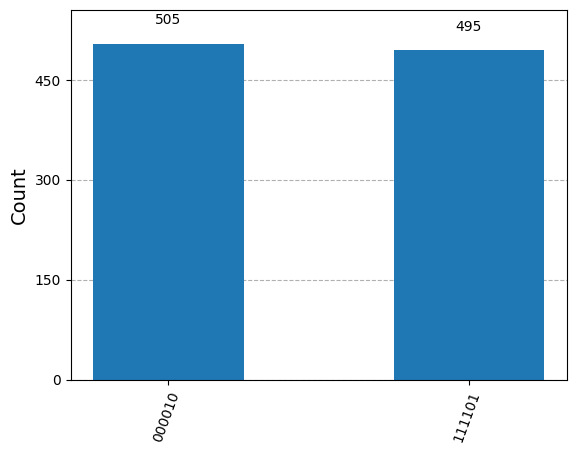

In [28]:
qch3 = QuantumCircuit(6)

## Enable Entanglement
qch3.h(0)
for i in range(1,6):
    qch3.cx(0,i)

# XYX
qch3.x(0)
qch3.y(0)
qch3.x(0)
# XZX
qch3.x(1)
qch3.z(1)
qch3.x(1)
# YXY
qch3.y(2)
qch3.x(2)
qch3.y(2)
# YZY
qch3.y(3)
qch3.x(3)
qch3.y(3)
# ZXZ
qch3.z(4)
qch3.x(4)
qch3.z(4)
# ZYZ
qch3.z(5)
qch3.y(5)
qch3.z(5)

qch3.measure_all()
qch3.draw()
result4 = sampler.run([qch3], shots=1000).result()

plot_histogram(result4[0].data.meas.get_counts())

### Explore what happens when you multiply the pauli matrices

In [35]:
px = np.matrix([[complex(0),complex(1)],[complex(1),complex(0)]])
py = np.matrix([[complex(0),-1j],[1j,complex(0)]])
pz = np.matrix([[complex(1),complex(0)],[complex(0),complex(-1)]])
id_mat = np.matrix([[complex(1),complex(0)],[complex(0),complex(1)]])

print(f'Pauli X squared = {np.dot(px, px).tolist()}')
print(f'Pauli X squared == Identity(2)?: {np.all((np.dot(px, px)==id_mat) == True)}')
print(f'Pauli Y squared = {np.dot(py, py).tolist()}')
print(f'Pauli Y squared == Identity(2)?: {np.all((np.dot(py, py)==id_mat) == True)}')
print(f'Pauli Z squared = {np.dot(pz, pz).tolist()}')
print(f'Pauli Z squared == Identity(2)?: {np.all((np.dot(pz, pz)==id_mat) == True)}')


Pauli X squared = [[(1+0j), 0j], [0j, (1+0j)]]
Pauli X squared == Identity(2)?: True
Pauli Y squared = [[(1+0j), 0j], [0j, (1+0j)]]
Pauli Y squared == Identity(2)?: True
Pauli Z squared = [[(1+0j), 0j], [0j, (1+0j)]]
Pauli Z squared == Identity(2)?: True


In [37]:
print(f'XZX = {np.dot(px, pz, px).tolist()}')
print(f'XYX = {np.dot(px, py, pz).tolist()}')

XZX = [[0j, 1j], [-1j, 0j]]
XYX = [[(-1+0j), 0j], [0j, (-1+0j)]]


### Explore using Hadamard gate on column vectors

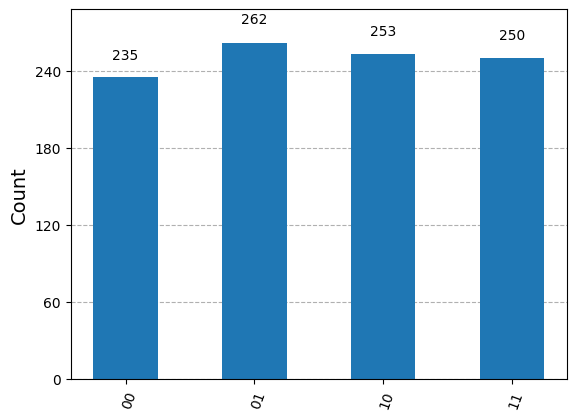

In [13]:
qcx = QuantumCircuit(2)
qcx.x(0)
qcx.h(0)
qcx.h(1)
qcx.measure_all()
qcx.draw()
resultx = sampler.run([qcx], shots=1000).result()

plot_histogram(resultx[0].data.meas.get_counts())

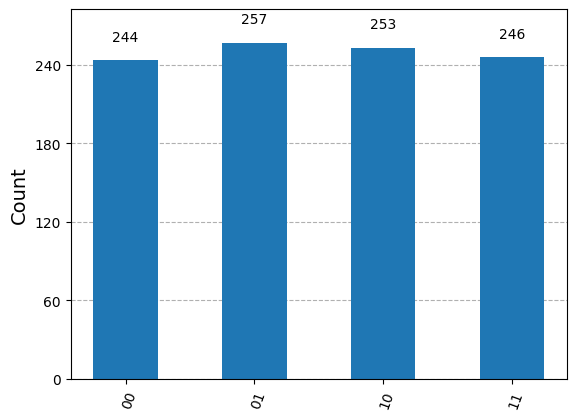

In [14]:
qcy = QuantumCircuit(2)
qcy.x(1)
qcy.h(0)
qcy.h(1)
qcy.measure_all()
qcy.draw()
resulty = sampler.run([qcy], shots=1000).result()

plot_histogram(resulty[0].data.meas.get_counts())